<a href="https://colab.research.google.com/github/jugernaut/MACTI-manejodatos/blob/principal/Simulacion/05_Envoltorios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Envoltorios (Wrappers)</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesor: M. en C. Miguel Angel Pérez León</i></h5>
  <h5 align="center"><i>Ayudante: Diana Laura Rojas Cristino</i></h5>
  <h5 align="center"><i>Ayudante: Rodrigo Alejandro Sánchez Morales</i></h5>
  <h5 align="center"><i>Materia: Manejo de Datos</i></h5>>
  </font>

# Introducción

Una vez que ya se conocen las principales *API's* para programar en paralelo como *OpenMP*, *MPI* o *CUDA*, así como sus ventajas y desventajas podemos comenzar a utilizar alternativas como lo son los ***wrappers*** (envoltorios).

Un *wrapper* es un conjunto de librerías y herramientas (en otro lenguaje diferente a *C/C++*) que actúa como puente y oculta muchos de los detalles de este tipo de *API's*.

Existe una infinidad de lenguajes de alto nivel que permiten hacer uso de estos *wrappers*, como lo son *JAVA*, *Python*, *R*, etc.

Para esta presentación nos enfocaremos en el lenguaje *Python* y algunos de los *wrappers* que existen en este lenguaje ya que las ventajas que ofrece este lenguaje lo hacen ideal para su uso en este curso.

Dos de los envoltorios más populares para *Python* son *Numba* y *TensorFlow*.

A pesar de la gran cantidad de *wrappers* que existen actualmente, debido a los alcances del curso, solo podremos revisar *Numba* y *TensorFlow*.

Aquí podemos ver las diferentes capas que se construyen con *Python*.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/master/Imagenes/Wrappers/wrapper.png?raw=1" width="600"> 
</center>

Los 2 diferentes enfoques que se les puede dar a los envoltorios.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/master/Imagenes/Wrappers/arribabajo.png?raw=1" width="600"> 
</center>

Flujo de *Numba*, ¿cómo es que se optimiza el código?.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/master/Imagenes/Wrappers/numba.png?raw=1" width="600"> 
</center>

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/master/Imagenes/Wrappers/numba-arch.png?raw=1" width="600"> 
</center>

Relación entre *TensorFlow* y *Nvidia*.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/master/Imagenes/Wrappers/tensor2.png?raw=1" width="600"> 
</center>

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/master/Imagenes/Wrappers/tensor1.png?raw=1" width="600"> 
</center>

Capas en el desarrollo de *software*.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/master/Imagenes/Wrappers/tensordevice.jpg?raw=1" width="600"> 
</center>

## *CPU* v.s. *GPU*

Actualmente los dispositivos de cómputo contienen al menos un *CPU* y dentro de este *CPU* pueden estar contenidos varios núcleos, lo que permite el desarrollo de algoritmos en paralelo.

De igual manera, la mayoría de los dispositivos de cómputo contienen al menos un *GPU* y dentro de este *GPU* pueden existir varios núcleos, la principal diferencia entre ambos (*CPU* y *GPU*) es el propósito para el cuál fueron diseñados

Para fines prácticos (y del curso) podemos pensar que la diferencia principal entre una *CPU* (unidad de procesamiento central) y una *GPU* (**unidad de procesamiento gráfico**) radica en que un *CPU* es un dispositivo de cómputo de propósito general, puede realizar cualquier tipo de cómputo que se le asigne.

Por otro lado un *GPU* esta diseñado para el procesamiento gráfico, lo que significa que la forma en la que procesa información **esta optimizada para trabajar con matrices y vectores**.

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/MonteCarlo/cpu-vs-gpu.jpg?raw=1" width="600"> 
</center>

<center>
<img src="https://github.com/jugernaut/Numerico2021/blob/desarrollo/Figuras/MonteCarlo/mejor.png?raw=1" width="600"> 
</center>

# ¿Qué es *Numba*?

Según la documentación de *Numba*, "*Numba* es un compilador justo a tiempo para *Python* que funciona mejor en código que usa matrices, funciones de *Numpy* y ciclos.

En otras palabras, *Numba* es una paquetería (igual que *Numpy* o *Matplotlib*) que nos ayuda a que nuestros algoritmos se ejecuten de forma optimizada y en particular nos permite tener acceso a los *GPU's* disponibles en el hardware que estemos ejecutando nuestros algoritmos.

La forma más común de usar *Numba* es a través de su colección de *decoradores* que se pueden aplicar a sus funciones para indicarle a *Numba* que las compile. Cuando se realiza una llamada a una función decorada de *Numba*, **se compila en código máquina** "justo a tiempo" para su ejecución y todo o parte de su código puede ejecutarse posteriormente a la ¡velocidad del código máquina nativo!.

Para nuestros propósitos de hoy, *Numba* es un paquete de *Python* que le permite escribir código *Python* para *GPU*, y tambien puede usarse para programación en paralelo mediante *CPU's*.

## Dependencia Funcional

Existen muchas formas para poder identificar si existe la posibilidad de emplear alguna técnica de paralelización algun algoritmo.

Sin embargo la forma más sencilla de saber cuando NO ES POSIBLE programar algún algoritmo en su equivalente en paralelo, es mediante las dependencias funcionales.

La idea de **dependencia funcional** es la generalización del concepto de **dependencia lineal**. Se dice que un conjunto de funciones es **funcionalmente dependiente** si existe una relación funcional entre ellas, en otras palabras cuando alguna de las funciones del conjunto es expresable como función de las otras funciones definidas previamente dentro del conjunto.

Esto significa que cuando existe una dependencia funcional, para poder obtener el resultado del algoritmo $f_n(f_{n-1}(x))$ es necesario esperar el resultado de $f_{n-1}(x)$, lo que implica que este tipo de algoritmos no es candidato a ser programado en paralelo.

## ¿Cómo funciona?

*Numba* tiene multiples formás de optimizar codigo y lograr que este muestre un mejor desempeño, esto lo realiza mediante alguna de las siguientes variantes:

• Convierte código *Python* en código de máquina: al compilar código empleando *Numba*, este convierte el código en código de máquina y la segunda vez que sea ejecutado este se ejecuta en lenguaje de muy bajo nivel que se traduce en una ejecución más rápida.

• Es posible utilizar una capa (*layer*) para acceder a características de *OpenMP*.

• Es posible paralelizar código empleando utilidades de *MPI*.

• Tiene soporte para el uso de *GPU's* utilizando *CUDA* como *background*.


## Ventajas

*Numba* posee múltiples ventajas, aunque una de las más importantes es poder decidir como optimizar el código escrito en *Python*.

Es muy sencillo de instalar mediante *pip* e igual de fácil de usar que *Python*.

Se tiene una gran capacidad de acoplamiento con *Numpy* (biblioteca para cómputo científico).

Además de ser posible optar por un mecanismo para optimizar el código, *Numba* permite escribir código híbrido que combine lo mejor de las diferentes formás de optimizar el desempeño.

Emplear *Numba* es tan sencillo como importar la biblioteca y hacer uso de sus **decoradores** para optimizar el código.


## Desventajas

*Numba* tiene en realidad muy pocas desventajas.

La más evidente de estas es que **encapsula mucho de su funcionamiento**, es decir que en realidad funciona como caja negra.



### Decoradores

Un decorador en *Numba* es una forma de modificar funciones de manera tal que pueda ser optimizada empleando alguna de las técnicas previamente mencionadas.

Se puede pensar en un decorador en una función que recibe una función como parámetro y devuelve otra función optimizada como salida.

Una función de *Python* es envuelta por uno o más decoradores, una vez que se define esta función el decorador es evaluado y *Numba* devuelve una función optimizada que puede ser invocada desde *Python*.

El alcance del ó de los decoradores se limita al alcance de la función definida a la cual se le aplique dichos decoradores.



# Sintaxis *Numba*

Al hacer uso de *Numba* (*CUDA*), debemos tomar en cuenta que la finalidad de *Numba* es acelerar el desempeño de nuestros algoritmos.

Para llevar a cabo tal propósito, *Numba* provee de sentencias que se agregan al código de *Python* conocidos como *decoradores*. Estos decoradores son de diferentes tipos, ya que *Numba* permite acelerar el desempeño de diferentes formas.

Mediante *Numba* los cálculos de nuestros algoritmos se pueden distribuir entre el *CPU* y el *GPU*, es por eso que *Numba* nos ofrece una forma para distinguir cuáles de nuestras funciones se ejecutan en uno u otro dispositivo de cómputo. 

### `nopython=True`

El decorador más sencillo de usar en *Numba* es el decorador `@jit` (*Just in time*) y permite recibir multiples parametros que indican la forma en la que se quiere optimizar el código (ver referencias). Si se usa este decorador sin parámetros *Numba* decide cuál es la mejor forma para optimizar el desempeño del algoritmo.

Uno de sus parámetros más elementales pero al mismo tiempo uno de los más usados, es el parametro `nopython=True`.

Al hacer uso de este decorador se le indica a *Numba* que el código que pertenece a esta definición debe ser optimizado y esto se lleva a cabo, convirtiendo el código de python en **código de máquina**, esto toma un poco más de tiempo la primera vez que se ejecuta, pero las siguientes veces tomará mucho menos tiempo que una función en *Python* nativo.

In [2]:
pip install numba

  Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.8 kB)
Using cached numba-0.60.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
Using cached llvmlite-0.43.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import random
# biblioteca de Numba
from numba import jit

#¡¡¡descomentar para optimizar, te vas a sorprender!!!
@jit(nopython=True)
def mc_pi_aprox(n=100000000):
    dentro_circulo = 0 
    for i in range(n):
      x = random.random()
      y = random.random()
      # valores dentro de la circunferencia
      if (x**2+y**2 < 1):
          dentro_circulo += 1
    return 4*dentro_circulo / n

In [4]:
%%time
mc_pi_aprox()

CPU times: user 1.88 s, sys: 254 ms, total: 2.13 s
Wall time: 1.84 s


3.1415194

En el ejemplo de la celda superior en la cuál se aproxima el valor de $\pi$ mediante Monte Carlo, al ejecutarlo sin el uso de *Numba* (solo *Python* nativo), podemos notar que el tiempo de ejecución se incrementa de manera proporcional a la precisión que usemos. 

Por otro lado, si se usa el decorador *@jit(nopython=True)*, qué es equivalente a *@njit*, de manera explicita se le pide a *Numba*, que convierta el **código a código de máquina**. Y el tiempo de ejecución disminuye de manera notable.

### `parallel` (*OpenMP*)

Otro parámetro muy útil pero a la vez 'obscuro' es, `@njit(parrallel=True)`.

Este decorador va de la mano de la palabra reservada `prange` y en conjunto permiten ejecutar en paralelo ciclos dentro de la función definida.

Este decorador oculta mucho del proceso que se realiza al ejecutar un algoritmo en paralelo. Sin embargo ya que a esta altura del curso se conoce cual es el transfondo (*OpenMP, MPI, CUDA*), podemos obviar el mismo.

La parlabra reservada `prange` se emplea para especificar el ciclo que se quiere realizar en paralelo y no solo eso, también realiza la operación conocida como *reduction* de alguna variable.

In [5]:
# import de biblioteca calculos numericos
import math

# aproximacion de Pi mediante sumas de Reimann (version secuencial)
def aproxPIsec(n=10000000):
    suma=0
    # funcion a integrar
    f = lambda x: math.sqrt(1-x**2)
    delta = 1/n
    for i in range(1,n+1):
        #x = delta*(i-0.5) #punto medio
        x = delta*(i)
        suma += f(x)
    aproximacion = delta*suma*4
    return aproximacion

In [6]:
%%time
aproxPIsec()

CPU times: user 2.34 s, sys: 0 ns, total: 2.34 s
Wall time: 2.34 s


3.1415924535527124

Usamos la 'función mágica' `%%time` para mostrar el tiempo y el resultado de la ejecución de la celda en la que se hace uso de la versión secuencial de este algoritmo.

In [7]:
# import de biblioteca calculos numericos y paralelizacion
from numba import njit, prange, set_num_threads
import numpy as np
import math
# fijamos desde código el numero de hilos
set_num_threads(2)

# aproximacion de Pi mediante sumas de Reimann (version paralela)
@njit(parallel=True)
def aproxPIpar(n=10000000):
    suma=0
    # funcion a integrar
    f = lambda x: math.sqrt(1-x**2)
    delta = 1/n
    # prange indica que este for debe ser ejecutado en paralelo
    for i in prange(1,n+1):
        #x = delta*(i-0.5) #punto medio
        x = delta*(i)
        suma += f(x)
    aproximacion = delta*suma*4
    return aproximacion

In [8]:
%%time
aproxPIpar()

CPU times: user 669 ms, sys: 37.9 ms, total: 707 ms
Wall time: 691 ms


3.1415924535525024

#### Versión en paralelo

Hay varios puntos importantes a notar en la versión paralelo del algoritmo de la aproximación del valor de $\pi$ mediante sumas de Raimann:

1.   En la sección de imports, `njit`, `prange`, `set_num_threads`, estos son los elementos de *Numba* que nos permiten la ejecución de este algoritmo en paralelo.
2.   El decorador `@njit(parallel=True)` en conjunto con `prange`, nos indican que secciones del código se ejecutará en paralelo.
3.   *Numba* oculta la operación de *redcution sum*, de la variable `suma`.
4.   El tiempo de ejecución disminuye bastante en la versión en paralelo con respecto a la versión secuencial y no así la precisión, de hecho podemos descomentar la linea inmediata debajo del ciclo `for` para mejorar la precisión del algoritmo al usar el punto medio.



# Accediendo a la *GPU* de *Google Colab*

Para ejecutar las funciones de *Numba* usando las *GPU's* gratuitas de *Google*, tenemos que hacer un par de cosas:

1.   Primero, ir al menú *Runtime o Entorno de ejecución*, seleccionar *Cambiar tipo de tiempo de ejecución*, y en el cuadro emergente, en *Acelerador de hardware*, seleccione *GPU*, guardamos el cambio y listo.
2.   Idealmente, eso es todo lo que deberíamos tener que hacer. Pero en la práctica, aunque las bibliotecas *CUDA* están instaladas, en el momento de escribir este *jupyter*, *Colab* no puede encontrarlas automáticamente. Entonces, hay que averiguar dónde están y luego indicarle a *Colab*.

In [9]:
!find / -iname 'libdevice'
!find / -iname 'libnvvm.so'

find: ‘/proc/tty/driver’: Permission denied
find: ‘/sys/devices/virtual/powercap/dtpm’: Permission denied
find: ‘/sys/devices/virtual/powercap/intel-rapl’: Permission denied
find: ‘/etc/ssl/private’: Permission denied
find: ‘/root’: Permission denied
find: ‘/var/lib/apt/lists/partial’: Permission denied
find: ‘/var/cache/ldconfig’: Permission denied
find: ‘/var/cache/apt/archives/partial’: Permission denied
find: ‘/proc/tty/driver’: Permission denied
find: ‘/sys/devices/virtual/powercap/dtpm’: Permission denied
find: ‘/sys/devices/virtual/powercap/intel-rapl’: Permission denied
find: ‘/etc/ssl/private’: Permission denied
find: ‘/root’: Permission denied
find: ‘/var/lib/apt/lists/partial’: Permission denied
find: ‘/var/cache/ldconfig’: Permission denied
find: ‘/var/cache/apt/archives/partial’: Permission denied


Se debe seleccionar y pegar la ubicación de las bibliotecas en el siguiente cuadro de código (de preferencia elegir las versiones más recientes):

In [ ]:
import os
os.environ['NUMBAPRO_LIBDEVICE'] = "/usr/local/cuda-11.2/nvvm/libdevice"
os.environ['NUMBAPRO_NVVM'] = "/usr/local/cuda-11.2/nvvm/lib64/libnvvm.so"

Una vez que ya se le indicó a Colab donde encontrar las bibliotecas necesarias, podemos pasar por completo a python e importar la biblioteca de numba para *CUDA* mediante las siguientes instrucciones.

In [ ]:
from numba import cuda
import numba
print(cuda.gpus)

<Managed Device 0>


Para ver las características de la *GPU* a la que tenemos acceso usamos el siguiente comando.

In [ ]:
!nvidia-smi

Wed Nov 16 23:43:41 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Fractales (*CUDA*)

Un fractal se define como un objeto geométrico en el que se repite el mismo patrón a diferentes escalas y con distinta orientación.

Estos objetos (fractales) son de interés particular en las ciencias debido a sus propiedades y características.

En esta sección vamos a ver las diferencias en términos de velocidad (tiempo de ejecución) de generar fractales con *Numba*, de manera secuencial y en paralelo usando la *GPU*.

Mandelbrot creado en el CPU en 7.034753 segundos


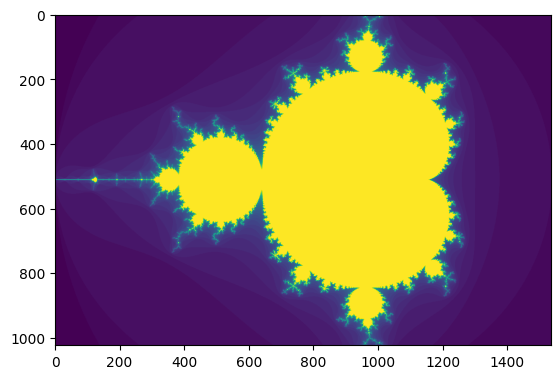

In [10]:
# PYTHON PURO
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer

# Funcion para colorear el punto (x, y)
def mandel(x, y, max_iters):
    c = complex(x, y)
    z = 0.0j
    for i in range(max_iters):
        z = z*z + c
        if z.real*z.real + z.imag*z.imag >= 4:
            return i
    return max_iters

# Funcion que genera el fractal 
def create_fractal(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape
    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height
    for x in range(width):
        real = xmin + x*pixel_size_x
        for y in range(height):
            imag = ymin + y*pixel_size_y
            color = mandel(real, imag, iters)
            image[y, x]  = color

# dimension del fractal
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

# se mide el tiempo que toma generar el fractal
start = timer()
create_fractal(xmin, xmax, ymin, ymax, gimage, iters)
dt = timer() - start

# se muestran los resultados
print("Mandelbrot creado en el CPU en %f segundos" % dt)
plt.imshow(gimage);

Mandelbrot creado en el CPU optimizado en 0.603021 segundos


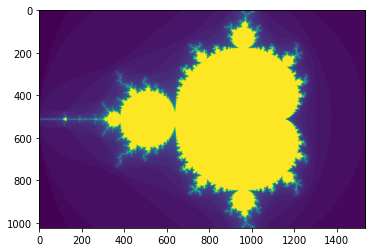

In [ ]:
# CON NUMBA EN CPU
import numba
# se convierte la funcion madel en version optimizada
mandel_numba = numba.jit(mandel)

# con el decorador tambien se optimiza la funcion que genera el fractal
@numba.jit
def create_fractal_numba(xmin, xmax, ymin, ymax, image, iters):
    height, width = image.shape
    pixel_size_x = (xmax - xmin)/width
    pixel_size_y = (ymax - ymin)/height
    for x in range(width):
        real = xmin + x*pixel_size_x
        for y in range(height):
            imag = ymin + y*pixel_size_y
            color = mandel_numba(real, imag, iters)
            image[y, x]  = color

# dimension del fractal
gimage = np.zeros((1024, 1536), dtype=np.uint8)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

# se mide el tiempo que toma generar el fractal
start = timer()
create_fractal_numba(xmin, xmax, ymin, ymax, gimage, iters)
dt = timer() - start

# se muestran los resultados
print("Mandelbrot creado en el CPU optimizado en %f segundos" % dt)
plt.imshow(gimage); 

Mandelbrot creado en el GPU en 0.010018 segundos


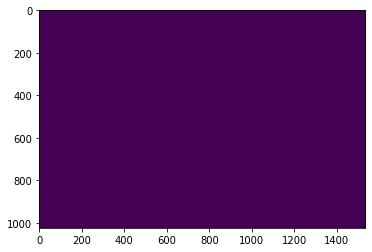

In [ ]:
# CON NUMBA EN GPU
from numba import *
import matplotlib.pyplot as plt
from numba import cuda

# Se convierte la funcion original en su version para GPU
mandel_gpu = cuda.jit(mandel, device=True)

# Decorador y parametros para convertir la funcion para GPU
@cuda.jit((float32, float32, float32, float32, uint8[:,:], uint32))
def mandel_kernel(min_x, max_x, min_y, max_y, image, iters):
  height, width = image.shape
  pixel_size_x = (xmax - xmin)/width
  pixel_size_y = (ymax - ymin)/height
  startX, startY = cuda.grid(2)
  gridX = cuda.gridDim.x * cuda.blockDim.x 
  gridY = cuda.gridDim.y * cuda.blockDim.y 
  for x in range(startX, width, gridX):
      real = xmin + x*pixel_size_x
      for y in range(startY, height, gridY):
          imag = ymin + y*pixel_size_y
          color = mandel_gpu(real, imag, iters)
          image[y, x]  = color

# dimension del fractal
gimage = np.zeros((1024, 1536), dtype = np.uint8)
# parametros para la GPU
blockdim = (32, 8)
griddim = (32,16)
xmin, xmax, ymin, ymax = np.array([-2.0, 1.0, -1.0, 1.0]).astype('float32')
iters = 50

# se mide el tiempo que toma generar el fractal
start = timer()
# se manda la info a la GPU
d_image = cuda.to_device(gimage)
mandel_kernel[griddim, blockdim](xmin, xmax, ymin, ymax, d_image, iters)
# se extrae info de la GPU
d_image.copy_to_host()
dt = timer() - start

# se muestran los resultados
print("Mandelbrot creado en el GPU en %f segundos" % dt)
plt.imshow(gimage)

# Glosario

*Layer*: Capa informática, nivel o capa que se oculta una parte del *software*.

*Background*: En computación entorno que da soporte a un determinado software. 

# Referencias

* https://numba.pydata.org/numba-doc/latest/user/5minguide.html
* https://nyu-cds.github.io/python-numba/01-jit/
* https://christophdeil.com/download/2019-07-11_Christoph_Deil_Numba.pdf
* https://numba.pydata.org/numba-doc/dev/cuda/kernels.html
* Tolga Soyata: GPU Parallel Program Development Using CUDA.